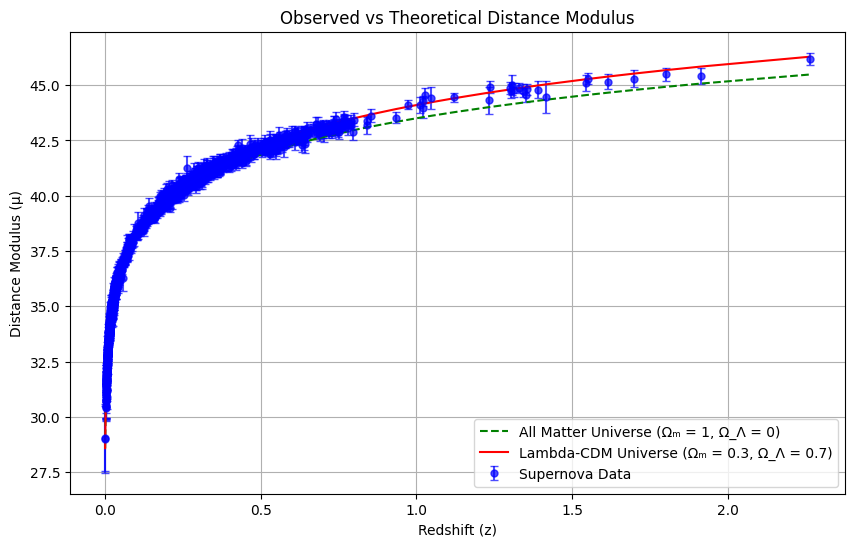

First 5 observed distance moduli: [28.9987 29.0559 30.7233 30.7449 30.7757]
First 5 theoretical distance moduli (All Matter Universe): [28.59107426 28.59107426 30.20120066 30.20120066 30.53858941]
First 5 theoretical distance moduli (Lambda-CDM Universe): [28.59246374 28.59246374 30.20411319 30.20411319 30.54198998]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
c = 299792.458  # Speed of light in km/s
H0 = 70         # Hubble constant in km/s/Mpc

# Load the supernova data
data = np.loadtxt("Pantheon+SHOES renew.dat")
z_data_sn = data[:, 0]  # Redshift
mu_sn = data[:, 1]     # Observed distance modulus
sig_mu = data[:, 2]    # Error in distance modulus

# Define the Hubble parameter function
def hubble_parameter(z, Om, OL):
    return H0 * np.sqrt(Om * (1 + z)**3 + OL)

# Define the integrand for the luminosity distance
def integrand(z, Om, OL):
    return c / hubble_parameter(z, Om, OL)

# Function to calculate the luminosity distance
def luminosity_distance(z, Om, OL):
    result, _ = quad(integrand, 0, z, args=(Om, OL))
    return (1 + z) * result

# Function to calculate the distance modulus
def distance_modulus(z, Om, OL):
    dL = luminosity_distance(z, Om, OL)
    return 5 * np.log10(dL) + 25

# Calculate theoretical distance modulus for each model
mu_matter = np.array([distance_modulus(z, Om=1.0, OL=0.0) for z in z_data_sn])  # All Matter Universe
mu_lcdm = np.array([distance_modulus(z, Om=0.3, OL=0.7) for z in z_data_sn])    # Lambda-CDM Universe

# Plot the observed and theoretical distance moduli
plt.figure(figsize=(10, 6))

# Plot observed data with error bars
plt.errorbar(z_data_sn, mu_sn, yerr=sig_mu, fmt='o', color='blue', label="Supernova Data", markersize=5, capsize=3, alpha=0.7)

# Plot theoretical distance moduli
plt.plot(z_data_sn, mu_matter, 'g--', label="All Matter Universe (Ωₘ = 1, Ω_Λ = 0)")
plt.plot(z_data_sn, mu_lcdm, 'r-', label="Lambda-CDM Universe (Ωₘ = 0.3, Ω_Λ = 0.7)")

# Add labels, title, and legend
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (μ)')
plt.title('Observed vs Theoretical Distance Modulus')
plt.legend()
plt.grid(True)
plt.show()

# Print the first 5 values for comparison
print("First 5 observed distance moduli:", mu_sn[:5])
print("First 5 theoretical distance moduli (All Matter Universe):", mu_matter[:5])
print("First 5 theoretical distance moduli (Lambda-CDM Universe):", mu_lcdm[:5])

In [2]:
# Load the covariance matrix
cov_data = np.loadtxt("Pantheon+SH0ES_STAT+SYS.cov", skiprows=1)  # Skip the first line
cov_matrix = cov_data.reshape(1701, 1701)  # Reshape into (1701, 1701)

# Compute the inverse of the covariance matrix
cov_inv = np.linalg.inv(cov_matrix)

# Function to calculate chi-squared
def chisq_cov(D, T, cov_inv):
    diff = D - T  # Residuals (Observed - Theoretical)
    chisq = np.dot(diff.T, np.dot(cov_inv, diff))  # (diff Transpose) * C^-1 * diff
    return chisq


# Calculate chi-squared for each model
chisq_matter = chisq_cov(mu_sn, mu_matter, cov_inv)  # All Matter Universe
chisq_lcdm = chisq_cov(mu_sn, mu_lcdm, cov_inv)      # Lambda-CDM Universe

# Print the results
print(f"Chi-square for All Matter Universe (Ωₘ = 1, Ω_Λ = 0): {chisq_matter:.2f}")
print(f"Chi-square for Lambda-CDM Universe (Ωₘ = 0.3, Ω_Λ = 0.7): {chisq_lcdm:.2f}")

# Determine the best-fitting model
best_fit = min([("All Matter Universe", chisq_matter), ("Lambda-CDM Universe", chisq_lcdm)], key=lambda x: x[1])
print(f"\nThe best-fitting model is: {best_fit[0]} with χ² = {best_fit[1]:.2f}")

Chi-square for All Matter Universe (Ωₘ = 1, Ω_Λ = 0): 2849.78
Chi-square for Lambda-CDM Universe (Ωₘ = 0.3, Ω_Λ = 0.7): 2609.20

The best-fitting model is: Lambda-CDM Universe with χ² = 2609.20
